In [1]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 36.6 MB/s eta 0:00:00


In [2]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import plotly.express as px
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
phish_data = pd.read_csv('phishing_site_urls.csv')
phish_data

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [4]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [6]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
phish_data.isnull().sum() # there is no missing values

,0
URL,0
Label,0


In [8]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())
label_counts

,count
Label,
good,392924
bad,156422


In [9]:
import pandas as pd
import plotly.express as px

data = {
    'Label': ['bad', 'good'],
    'count': [69973, 48103]
}
label_counts = pd.DataFrame(data)

# Visualizing the data
fig = px.bar(label_counts, x='Label', y='count', title='Phishing Label Counts')
fig.show()

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
tokenizer

RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [11]:
phish_data.URL[0]
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.5780938379999725 sec


In [13]:
phish_data.sample(5)

,URL,Label,text_tokenized
499356,www.lefaos.50webs.com/nJHbj0266b?EYywKnoMCqD=Y...,bad,"[www, lefaos, webs, com, nJHbj, b, EYywKnoMCqD..."
221741,niallfennessyphotography.blogspot.com/,good,"[niallfennessyphotography, blogspot, com]"
55966,repositorium.sdum.uminho.pt/bitstream/1822/403...,good,"[repositorium, sdum, uminho, pt, bitstream, pdf]"
220149,navweaps.com/index_oob/OOB_WWII_Pacific/OOB_WW...,good,"[navweaps, com, index, oob, OOB, WWII, Pacific..."
43747,toujoursports.com/Paypal_Virefication/5f8a8656...,bad,"[toujoursports, com, Paypal, Virefication, f, ..."


In [14]:
stemmer = SnowballStemmer("english") # choose a language

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 40.145631906999995 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
144975,articles.cnn.com/keyword/alan-mulally,good,"[articles, cnn, com, keyword, alan, mulally]","[articl, cnn, com, keyword, alan, mulal]"
67708,tools.ietf.org/html/rfc1738,good,"[tools, ietf, org, html, rfc]","[tool, ietf, org, html, rfc]"
468781,yellowpages.com.au/sa/beulah-park/mott-propert...,good,"[yellowpages, com, au, sa, beulah, park, mott,...","[yellowpag, com, au, sa, beulah, park, mott, p..."
501850,daughtersandsonstowork.org/,bad,"[daughtersandsonstowork, org]","[daughtersandsonstowork, org]"
285434,athleticsnation.com/2010/12/28/1899789/greates...,good,"[athleticsnation, com, greatest, as, position,...","[athleticsn, com, greatest, as, posit, player,..."


In [17]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.20739833199996838 sec


In [18]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
358930,imdb.com/name/nm0642598/,good,"[imdb, com, name, nm]","[imdb, com, name, nm]",imdb com name nm
288554,baseball-reference.com/players/l/lowerte01.shtml,good,"[baseball, reference, com, players, l, lowerte...","[basebal, refer, com, player, l, lowert, shtml]",basebal refer com player l lowert shtml
493073,hepc.co.in/kjnm/0okm/848/DCWfb_.php,bad,"[hepc, co, in, kjnm, okm, DCWfb, php]","[hepc, co, in, kjnm, okm, dcwfb, php]",hepc co in kjnm okm dcwfb php
38227,zarnawski.com/serviceppl_456/uk/f2af4ac0a5d294...,bad,"[zarnawski, com, serviceppl, uk, f, af, ac, a,...","[zarnawski, com, serviceppl, uk, f, af, ac, a,...",zarnawski com serviceppl uk f af ac a d e e d d b
88978,www.stellent.com/stellent3/idcplg?IdcService=S...,good,"[www, stellent, com, stellent, idcplg, IdcServ...","[www, stellent, com, stellent, idcplg, idcserv...",www stellent com stellent idcplg idcservic ss ...


In [19]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [22]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# d = '../input/masks/masks-wordclouds/'

In [23]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

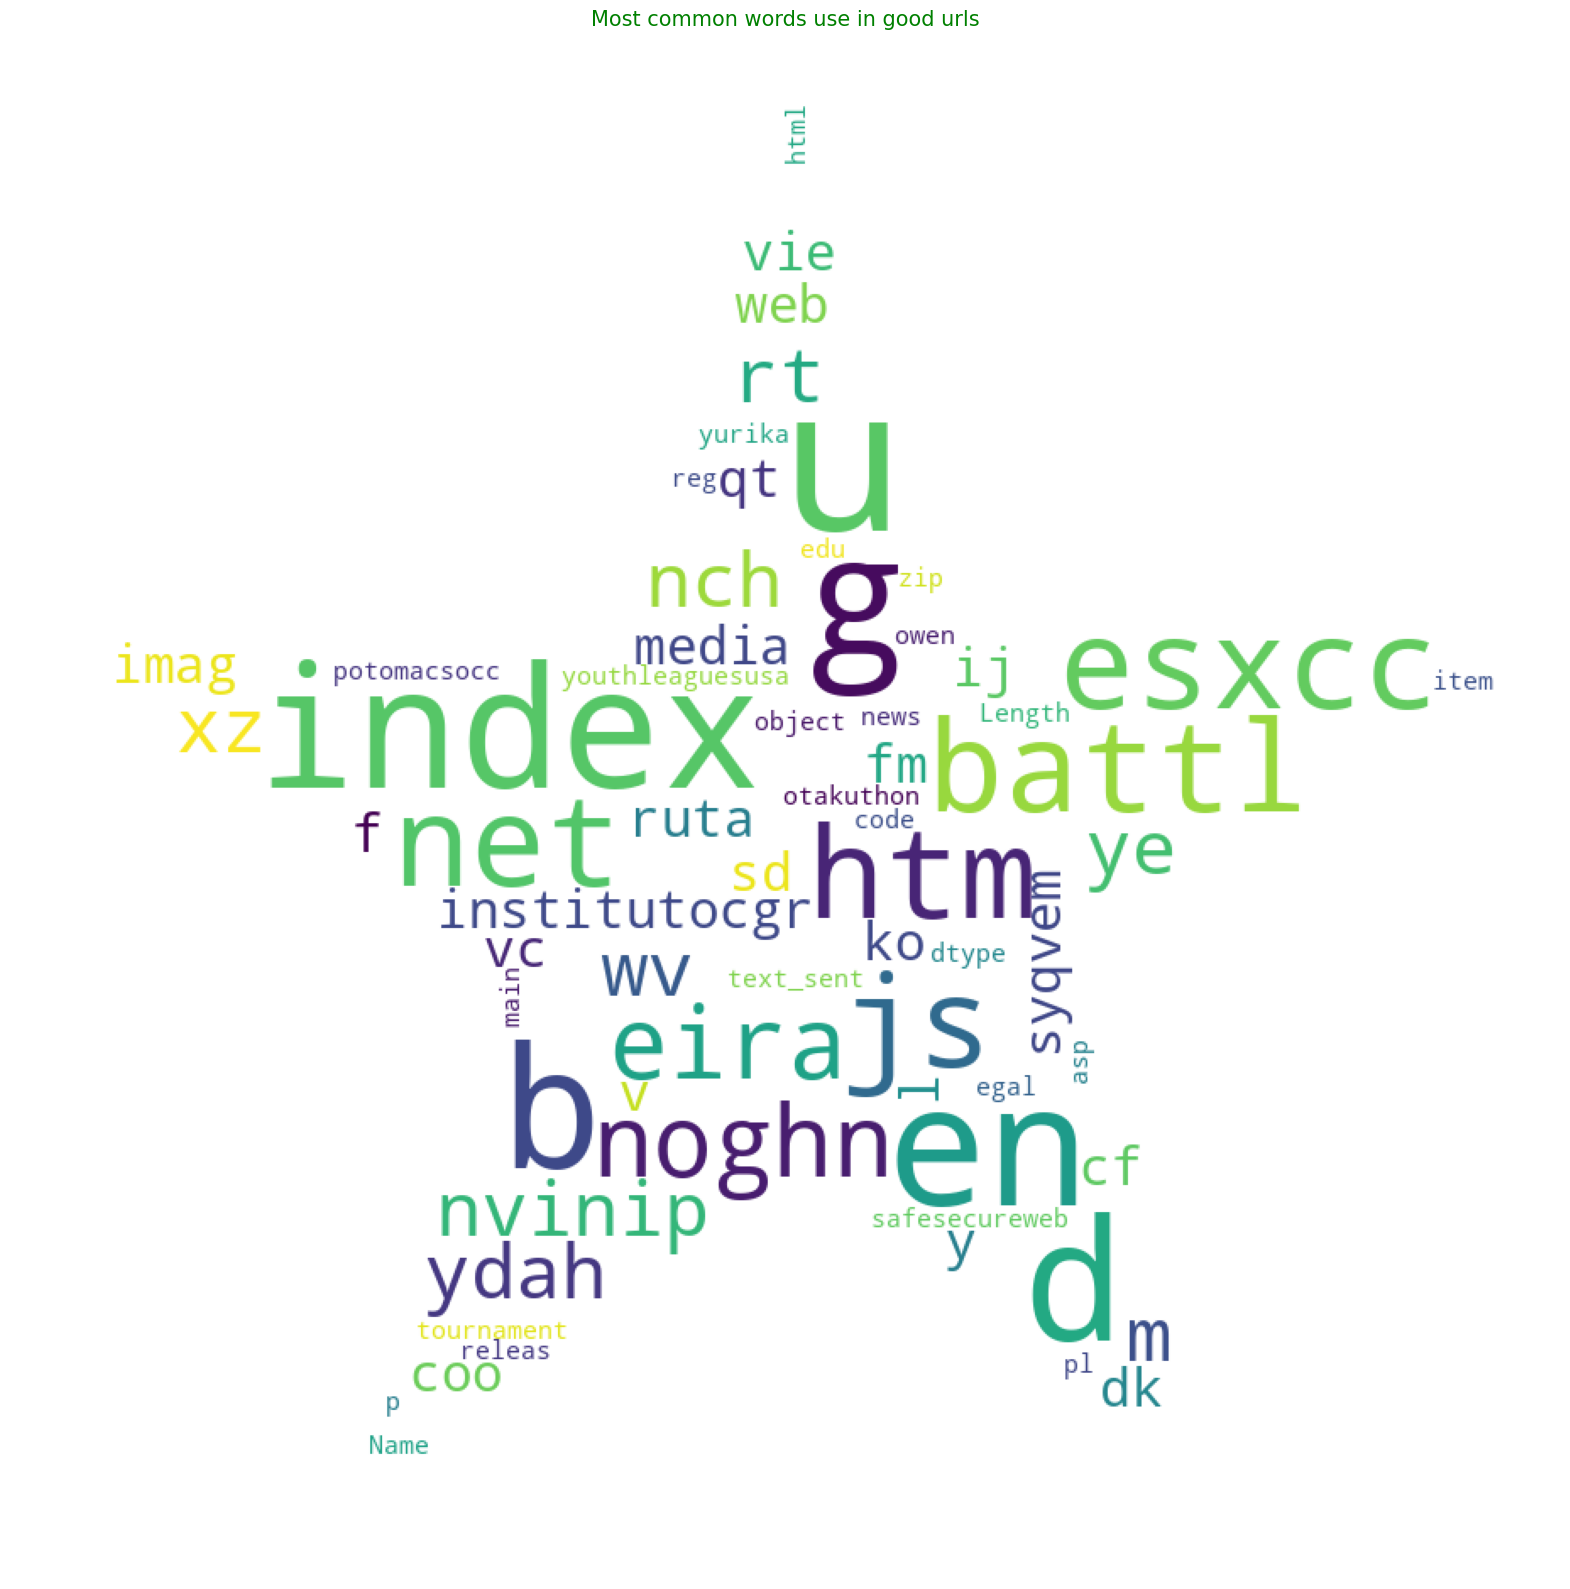

In [25]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, title = 'Most common words use in good urls', title_size=15)

In [26]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

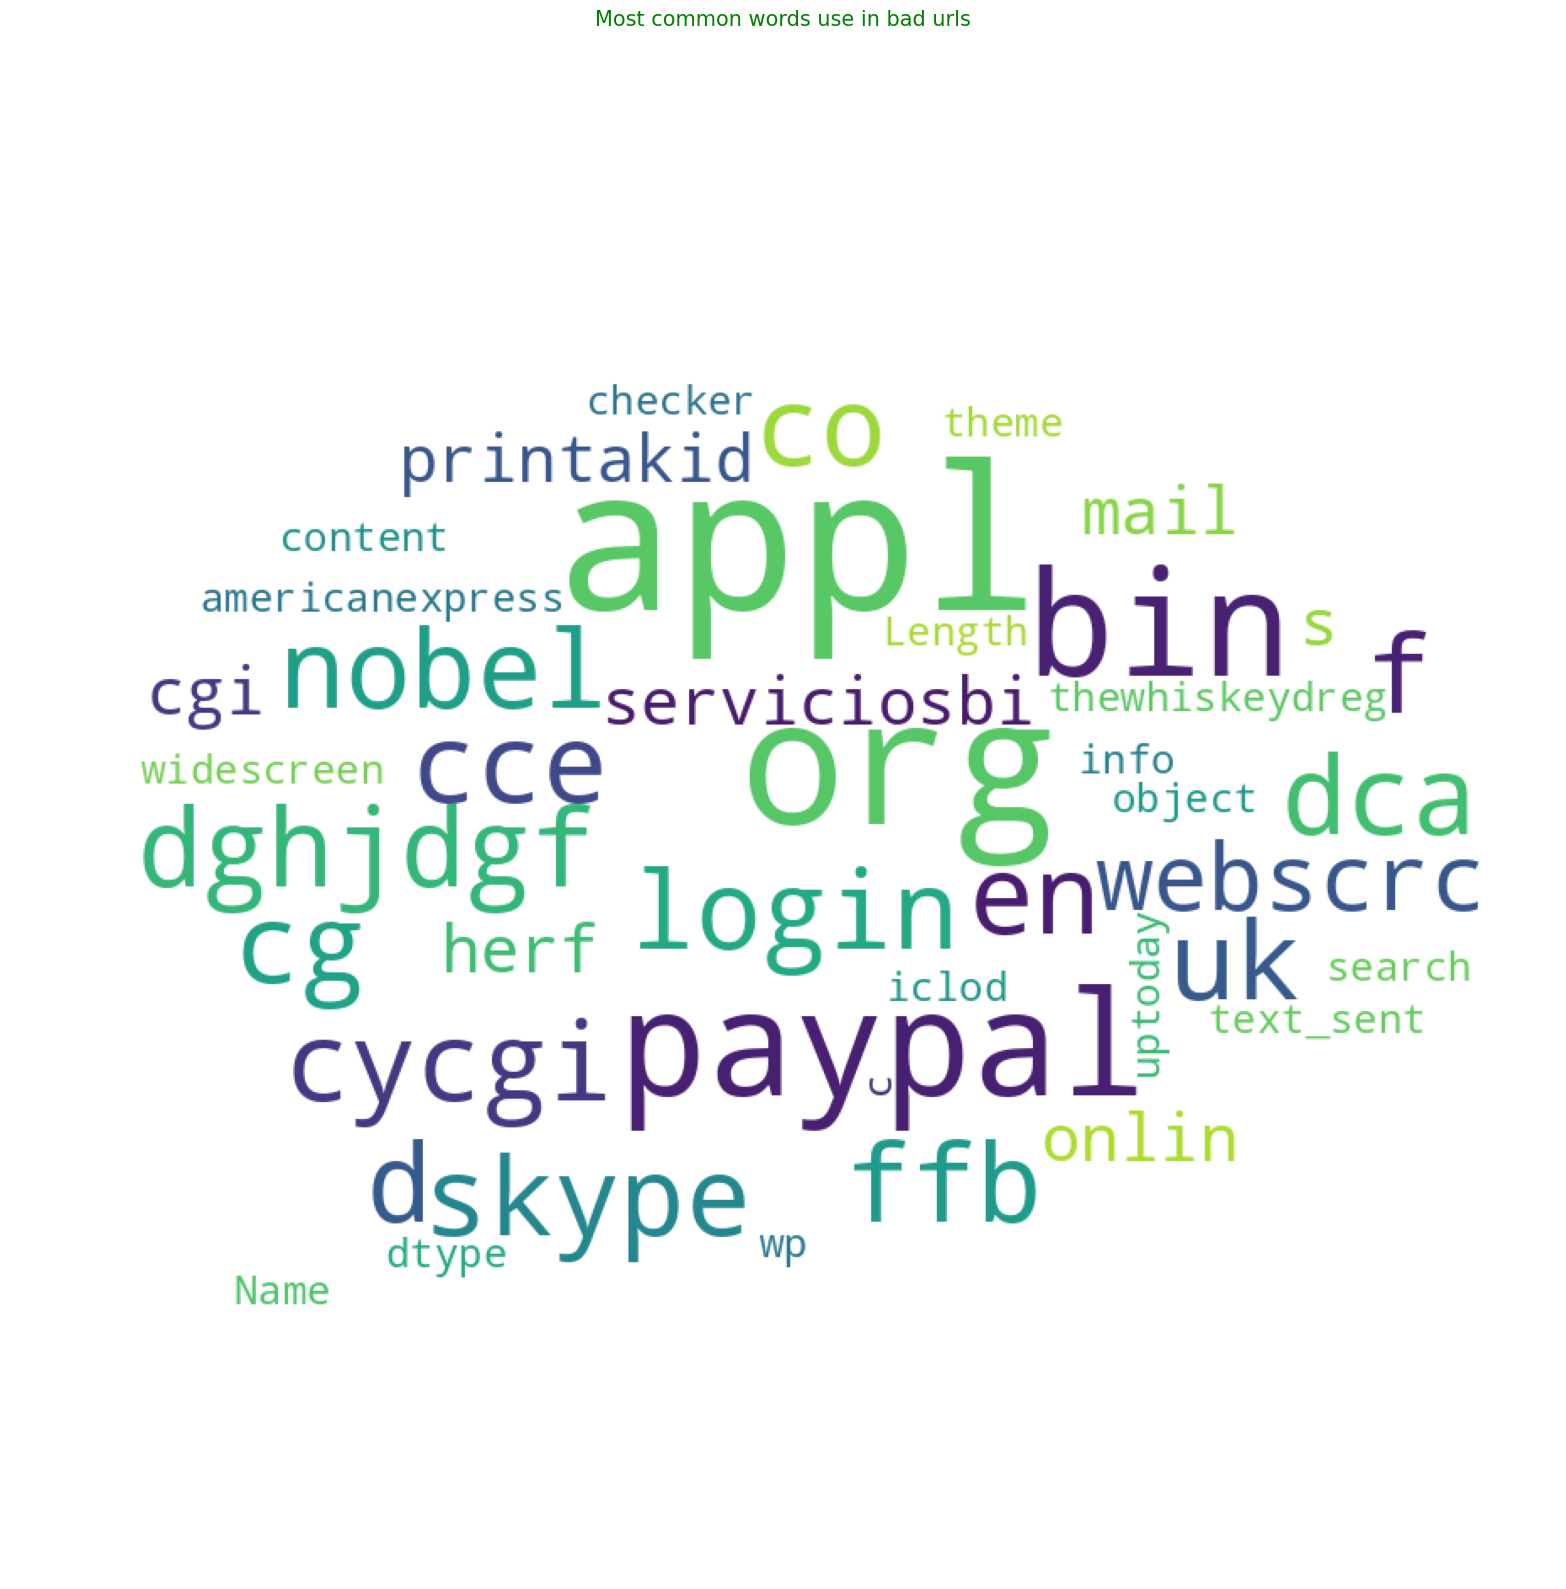

In [27]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)

In [28]:
#create cv object
cv = CountVectorizer()

In [29]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_a

In [30]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [31]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [33]:
# create lr object
lr = LogisticRegression()

In [34]:
print(trainX)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2756886 stored elements and shape (412009, 350837)>
  Coords	Values
  (0, 209705)	1
  (0, 278597)	1
  (0, 287769)	1
  (0, 94030)	1
  (1, 336148)	1
  (1, 72850)	1
  (1, 60515)	1
  (1, 312725)	1
  (1, 144336)	1
  (1, 38596)	1
  (1, 6181)	1
  (2, 58334)	1
  (2, 311525)	1
  (2, 18514)	1
  (2, 227504)	1
  (2, 44494)	1
  (2, 32561)	1
  (3, 59829)	1
  (3, 234399)	1
  (3, 227426)	1
  (3, 213471)	1
  (3, 142617)	1
  (3, 309941)	2
  (3, 51182)	1
  (3, 86774)	1
  :	:
  (412004, 267141)	1
  (412004, 75920)	2
  (412004, 88890)	1
  (412004, 309209)	1
  (412004, 196)	2
  (412005, 59829)	1
  (412005, 182983)	1
  (412006, 59829)	1
  (412006, 137079)	1
  (412006, 11748)	1
  (412006, 49592)	1
  (412006, 303755)	1
  (412006, 183926)	1
  (412006, 303758)	1
  (412007, 92193)	1
  (412007, 224359)	1
  (412007, 104962)	1
  (412007, 330836)	1
  (412007, 330883)	1
  (412007, 260595)	1
  (412007, 106195)	1
  (412008, 209705)	1
  (412008, 75529)	1
  (4120

In [35]:
lr.fit(trainX,trainY)

LogisticRegression()

In [36]:
lr.score(testX,testY)

0.964328622294065

In [37]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9786533789310428
Testing Accuracy : 0.964328622294065

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36828
        Good       0.99      0.96      0.98    100509

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

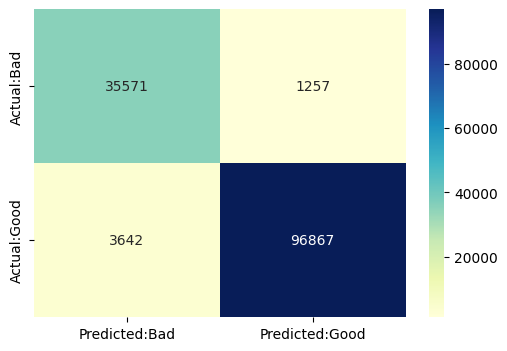

In [38]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [39]:
# create mnb object
mnb = MultinomialNB()

In [40]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [41]:
mnb.score(testX,testY)

0.9583433452019485

In [42]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741607586242048
Testing Accuracy : 0.9583433452019485

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38364
        Good       0.98      0.97      0.97     98973

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

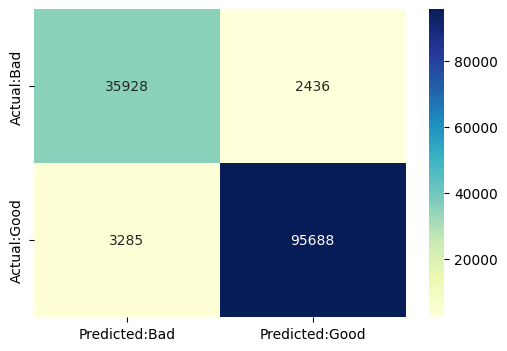

In [44]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(trainX, trainY)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

Training Accuracy : 0.7971888963590601
Testing Accuracy : 0.7970175553565317

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.40      0.79      0.53     19690
        Good       0.96      0.80      0.87    117647

    accuracy                           0.80    137337
   macro avg       0.68      0.79      0.70    137337
weighted avg       0.88      0.80      0.82    137337


CONFUSION MATRIX


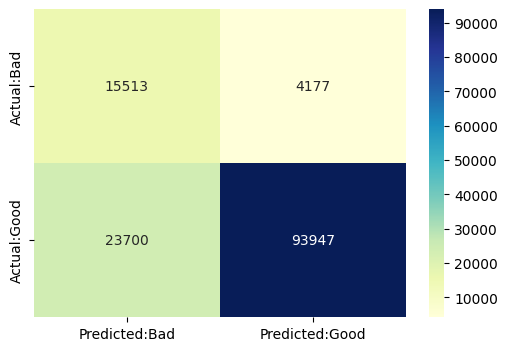

In [46]:
# Model evaluation
print('Training Accuracy :', dt.score(trainX, trainY))
print('Testing Accuracy :', dt.score(testX, testY))

# Confusion matrix
con_mat = pd.DataFrame(confusion_matrix(dt.predict(testX), testY),
            columns=['Predicted:Bad', 'Predicted:Good'],
            index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(dt.predict(testX), testY, target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, n_jobs=-1)
rf.fit(trainX, trainY)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, n_jobs=-1)

Training Accuracy : 0.7155183503272987
Testing Accuracy : 0.7144760698136701

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00         0
        Good       1.00      0.71      0.83    137337

    accuracy                           0.71    137337
   macro avg       0.50      0.36      0.42    137337
weighted avg       1.00      0.71      0.83    137337


CONFUSION MATRIX


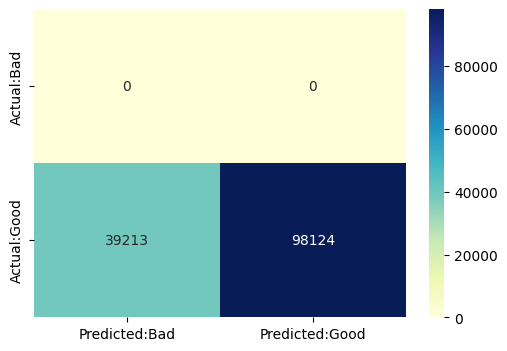

In [48]:
# Model evaluation
print('Training Accuracy :', rf.score(trainX, trainY))
print('Testing Accuracy :', rf.score(testX, testY))

# Confusion matrix
con_mat = pd.DataFrame(confusion_matrix(rf.predict(testX), testY),
            columns=['Predicted:Bad', 'Predicted:Good'],
            index=['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(rf.predict(testX), testY, target_names=['Bad', 'Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [49]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+)  -- these tolenizers giving me low accuray

In [50]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [51]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [52]:
pipeline_ls.score(testX,testY)

0.9665931249408389

Training Accuracy : 0.9807698375520923
Testing Accuracy : 0.9665931249408389

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36886
        Good       0.99      0.97      0.98    100451

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

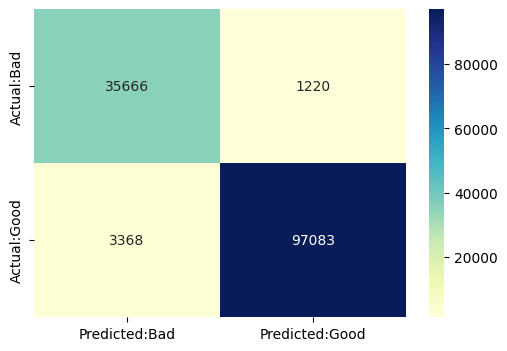

In [53]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [57]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [58]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9665931249408389


In [59]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
